## Introduction

Regression is also one type of supervised Machine learning and in this tutorial, we will discuss various metrics for evaluating regression Models and How to implement them using the scikit-learn library.

Regression is a type of Machine learning which helps in finding the relationship between independent and dependent variables.

In simple words, Regression can be defined as a Machine learning problem where we have to predict continuous values like price, Rating, Fees, etc.

Let's start with a simple example to understand the regression problem.

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd

cgpa = [6.89, 5.12, 7.82, 7.42, 6.94, 7.89, 6.73, 6.75, 6.09]
package = [3.26, 1.98, 3.25, 3.67, 3.57, 2.99, 2.6, 2.48, 2.31]
df = pd.DataFrame({'cgpa' : cgpa, 'package' : package})
y = df['package']
X = df.drop('package', axis = 1)

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print(y_pred)

[2.86114942 1.90257867]


## Mean Absolute Error (MAE)

MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete dataset.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.

$$ MAE = \frac{1}{n} \sum_{i=1}^{n} |y_{i} - \hat{y}_{i}| $$

Where:
- $y_{i}$ = Actual value
- $\hat{y}_{i}$ = Predicted value
- $n$ = Total number of observations

**Advantages of MAE**
- The MAE you get is in the same unit as the output variable.

- It is most Robust to outliers.

**Disadvantages of MAE**
- The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

In [2]:
def mean_absolute_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += abs(yt - yp)
    return error / len(y_true)

print(mean_absolute_error(y_test, y_pred))

0.3931359573449693


In [3]:
from sklearn.metrics import mean_absolute_error
print("MAE", mean_absolute_error(y_test,y_pred))

MAE 0.3931359573449693


## Mean Squared Error (MSE)

MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

$$ MSE = \frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2} $$

**Advantages of MSE**
- The graph of MSE is differentiable, so you can easily use it as a loss function.

**Disadvantages of MSE**
- The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.

- If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

In [4]:
def mean_squared_error(y_true, y_pred):
    error = 0
    for yt, yp in zip(y_true, y_pred):
        error += (yt - yp)**2
    return error / len(y_true)

print(mean_squared_error(y_test, y_pred))

0.2542316070402522


In [5]:
from sklearn.metrics import mean_squared_error
print("MSE", mean_squared_error(y_test,y_pred))

MSE 0.2542316070402522


## Root Mean Squared Error (RMSE)

As RMSE is clear by the name itself, that it is a simple square root of mean squared error.

$$ RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}} $$

**Advantages of RMSE**
- The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.

**Disadvantages of RMSE**
- It is not that robust to outliers as compared to MAE.

In [6]:
import numpy as np

print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 0.5042138505041807


Most of the time people use RMSE as an evaluation metric and mostly when you are working with deep learning techniques the most preferred metric is RMSE.

## Root Mean Squared Log Error(RMSLE)

Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

To control this situation of RMSE we take the log of calculated RMSE error and resultant we get as RMSLE.

To perform RMSLE we have to use the NumPy log function over RMSE.

In [7]:
print("RMSE", np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE -0.6847547943474257


It is a very simple metric that is used by most of the datasets hosted for Machine Learning competitions.

## R Squared (R2)

R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.

$$ R2 Squared = 1 - \frac{SS_{res}}{SS_{tot}} $$

Where:
- $SS_{res} = \sum_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2}$ = Residual Sum of Squares
- $SS_{tot} = \sum_{i=1}^{n} (y_{i} - \bar{y})^{2}$ = Total Sum of Squares
- $\bar{y}$ = Mean of the output variable

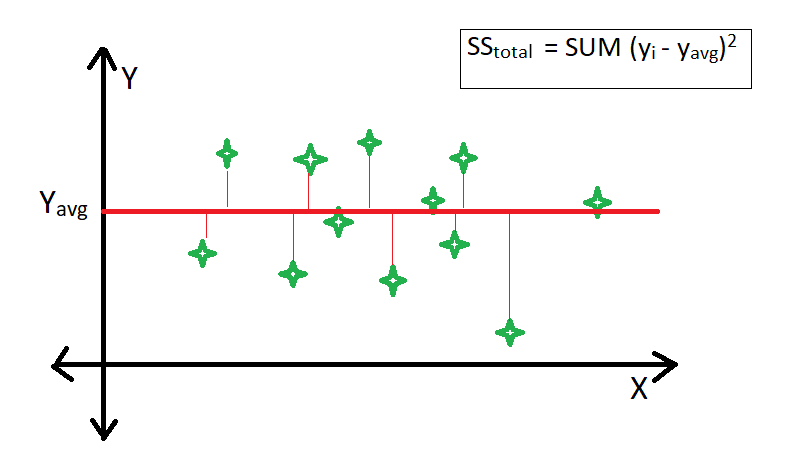

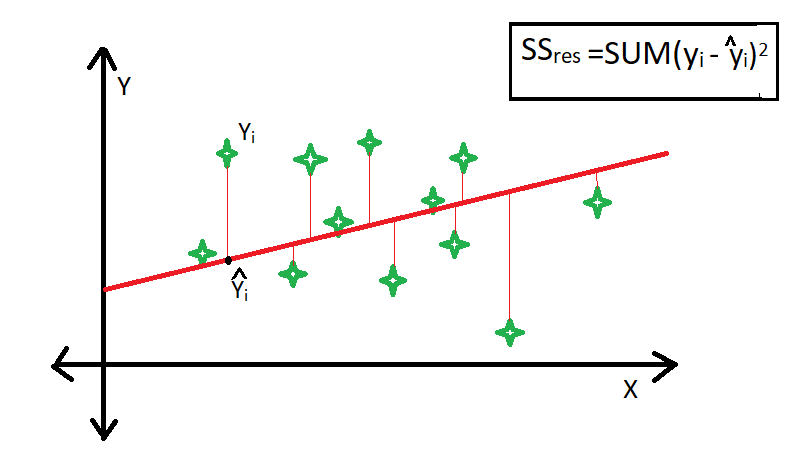

The goodness of fit of regression models can be analyzed on the basis of the R-square method. The more the value of the r-square near 1, the better the model is. 

***Note***: The value of R-square can also be negative when the model fitted is worse than the average fitted model. 

In [8]:
def r2(y_true, y_pred):
    mean_true = np.mean(y_true)
    numerator = 0
    denominator = 0
    for yt, yp in zip(y_true, y_pred):
        numerator += (yt - yp)**2
        denominator += (yt - mean_true)**2
    ratio = numerator / denominator
    return 1 - ratio

print("R2", r2(y_test, y_pred))

R2 0.5977507107468023


In [9]:
from sklearn.metrics import r2_score
print("R2", r2_score(y_test,y_pred))

R2 0.5977507107468023


## Adjusted R Squared

The disadvantage of the R2 score is that while adding new features to the data, the R2 score starts increasing or remains constant but never decreases. This happens because R2 assumes that adding more data increases the variance of the data. The problem arises when irrelevant features are added to the dataset, which can sometimes cause the R2 score to increase incorrectly.

To address this issue, Adjusted R-Squared was introduced. Adjusted R-Squared is an updated version of R-squared that takes into account the number of independent variables while calculating R-squared. The main problem with R-squared is that its value always increases with an increase in the number of independent variables, regardless of whether the independent variable is actually contributing to the model. This can lead to a model having high variance if it includes a lot of independent variables.

$$ \text{Adjusted R Squared} = 1 - \frac{(1 - R^2) * (n - 1)}{(n - k - 1)} $$

Where:
- $n$ = Total number of observations
- $k$ = Total number of independent variables
- $R^2$ = R Squared value

Now as K increases by adding some features so the denominator will decrease, n-1 will remain constant. R2 score will remain constant or will increase slightly so the complete answer will increase and when we subtract this from one then the resultant score will decrease. so this is the case when we add an irrelevant feature in the dataset.

And if we add a relevant feature then the R2 score will increase and 1-R2 will decrease heavily and the denominator will also decrease so the complete term decreases, and on subtracting from one the score increases.

In [10]:
n = 40
k = 2

def adj_r2(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

print("Adj R2", adj_r2(y_test, y_pred, n, k))

Adj R2 0.5760075059223051
